In [1]:
import numpy as np
import dezero.functions as F
from dezero import Variable

In [2]:
x = Variable(np.array(1.0))
y = F.sin(x)
print(y)

variable(0.8414709848078965)


In [3]:
x = Variable(np.array([[1,2,3], [4,5,6]]))
F.sin(x)

variable([[ 0.84147098  0.90929743  0.14112001]
          [-0.7568025  -0.95892427 -0.2794155 ]])

In [4]:
c = Variable(np.array([[10, 20, 30], [40, 50, 60]]))
x+c

variable([[11 22 33]
          [44 55 66]])

In [5]:
t = x+c
y = F.sum(t)
y

variable(231)

In [6]:
y.backward(retain_grad=True)
y.grad, t.grad, x.grad, c.grad

(variable(1),
 variable([[1 1 1]
           [1 1 1]]),
 variable([[1 1 1]
           [1 1 1]]),
 variable([[1 1 1]
           [1 1 1]]))

In [7]:
import numpy as np
x = np.array([[1,2,3], [4,5,6]])
y = np.reshape(x, (6,))
print(x)
print(y)

[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]


In [8]:
from dezero import Function
class Reshape(Function):
    def __init__(self, shape):
        self.shape=shape
    def forward(self,x):
        self.x_shape = x.shape
        y = x.reshape(self.shape)
        return y
    def backward(self, gy):
        return reshape(gy, self.x_shape)

In [9]:
x = np.random.rand(1,2,3)
print(x)
y = x.reshape((2,3))
print(y)
y = x.reshape([2,3])
print(y)
y = x.reshape(2,3)
print(y)

[[[0.0602721  0.56857985 0.39749557]
  [0.26547009 0.91721782 0.37429594]]]
[[0.0602721  0.56857985 0.39749557]
 [0.26547009 0.91721782 0.37429594]]
[[0.0602721  0.56857985 0.39749557]
 [0.26547009 0.91721782 0.37429594]]
[[0.0602721  0.56857985 0.39749557]
 [0.26547009 0.91721782 0.37429594]]


In [10]:
x = Variable(np.random.randn(1,2,3))
y = x.reshape((2,3))
print(y)
y = x.reshape(2,3)
print(y)

variable([[-0.04310457  0.7074444   0.37488145]
          [-0.81100186  0.66512776  0.73710086]])
variable([[-0.04310457  0.7074444   0.37488145]
          [-0.81100186  0.66512776  0.73710086]])


In [11]:
x = np.array([[1,2,3], [4,5,6]])
y = np.transpose(x)
y

array([[1, 4],
       [2, 5],
       [3, 6]])

In [12]:
x = Variable(np.array([[1,2,3], [4,5,6]]))
print(x)
y = F.transpose(x)
y.backward()
x.grad

variable([[1 2 3]
          [4 5 6]])


variable([[1 1 1]
          [1 1 1]])

In [13]:
a,b,c,d = 1,2,3,4
x = np.random.rand(a,b,c,d)
print(x)
y = x.transpose(1,0,3,2)
print(y)

[[[[0.3305407  0.74924311 0.10123041 0.19590596]
   [0.98338345 0.72593228 0.65803089 0.31911023]
   [0.98668651 0.13253125 0.54682684 0.67121247]]

  [[0.00276911 0.40627848 0.50530118 0.07081444]
   [0.46136546 0.92454273 0.02720188 0.24304346]
   [0.9429777  0.57822779 0.11302881 0.20181618]]]]
[[[[0.3305407  0.98338345 0.98668651]
   [0.74924311 0.72593228 0.13253125]
   [0.10123041 0.65803089 0.54682684]
   [0.19590596 0.31911023 0.67121247]]]


 [[[0.00276911 0.46136546 0.9429777 ]
   [0.40627848 0.92454273 0.57822779]
   [0.50530118 0.02720188 0.11302881]
   [0.07081444 0.24304346 0.20181618]]]]


In [14]:
x = Variable(np.array([1,2,3,4,5,6]))
y = F.sum(x)
y.backward()
y, x.grad

(variable(21), variable([1 1 1 1 1 1]))

In [15]:
x = Variable(np.array([[1,2,3],[4,5,6]]))
y = F.sum(x)
y.backward()
y, x.grad

(variable(21),
 variable([[1 1 1]
           [1 1 1]]))

In [16]:
x = np.array([[1,2,3], [4,5,6]])
y = np.sum(x, axis=0)
y

array([5, 7, 9])

In [17]:
y = np.sum(x, keepdims=True)
x, x.shape,y, y.shape

(array([[1, 2, 3],
        [4, 5, 6]]),
 (2, 3),
 array([[21]]),
 (1, 1))

In [18]:
print(np.sum(x, keepdims=True, axis=0).shape)
print(np.sum(x, keepdims=True, axis=1).shape)
x.shape

(1, 3)
(2, 1)


(2, 3)

In [19]:
import numpy as np

x = np.array([1,2,3])
y = np.broadcast_to(x, (2,3))
y

array([[1, 2, 3],
       [1, 2, 3]])

In [20]:
from dezero.utils import sum_to

x = np.array([[1,2,3],[4,5,6]])
print(x)
print("-----")
y = sum_to(x, (1,3))
print(y)
print("-----")
y = sum_to(x, (2,1))
print(y)

[[1 2 3]
 [4 5 6]]
-----
[[5 7 9]]
-----
[[ 6]
 [15]]


In [21]:
from dezero import as_variable

class BroadcastTo(Function):
    def __init__(self, shape):
        self.shape = shape
        
    def forward(self, x):
        self.x_shape = x.shape
        y = np.broadcast_to(x, self.shape)
        return y
    
    def backward(self, gy):
        gx = sum_to(gy, self.x_shape)
        return gx
    
def broadcast_to(x, shape):
    if x.shape==shape:
        return as_variable
    return BroadcastTo(shape)(x)

In [22]:
x0 = np.array([1,2,3])
x1 = np.array([10])
y = x0+x1
y

array([11, 12, 13])

In [23]:
x0 = Variable(np.array([1,2,3]))
x1 = Variable(np.array([10]))
y = x0+x1
y

variable([11 12 13])

In [24]:
y.backward()
y,x1.grad

(variable([11 12 13]), variable([3]))

In [25]:
a = np.array([1,2,3])
b = np.array([4,5,6])
c  = np.dot(a,b)
c

32

In [26]:
a = np.array([[1,2], [3,4]])
b = np.array([[5,6], [7,8]])
c = np.dot(a,b)
c

array([[19, 22],
       [43, 50]])

In [27]:
class MuatMul(Function):
    def forward(self, x,W):
        y = x.dot(W)
        return y
    def backward(self,gy):
        x,W = self.inputs
        gx = matmul(gy, W.t)
        gW = matmul(x.T, gy)
        return gx, gW
    
def matmul(x,W):
    return MatMul()(x,W)

In [28]:
from dezero import Variable
import dezero.functions as F
x = Variable(np.random.randn(2,3))
W = Variable(np.random.randn(3,4))
y = F.matmul(x,W)
y.backward()
x.grad.shape, W.grad.shape

((2, 3), (3, 4))

In [29]:
y.shape

(2, 4)

In [30]:
y

variable([[ 2.25444743 -2.30216816  1.02176734 -2.24105474]
          [-0.19599026 -0.19293763  0.12593365 -1.24833483]])

In [31]:
np.dot(x,W)

array([[variable(2.254447432496369), variable(-2.3021681598489723),
        variable(1.0217673430748635), variable(-2.2410547370850544)],
       [variable(-0.19599025973490178), variable(-0.19293762914515789),
        variable(0.12593364778101745), variable(-1.2483348264624223)]],
      dtype=object)

In [32]:
#42
import numpy as np
np.random.seed(0)
x = np.random.rand(100,1)
y = 5+ 2*x + np.random.rand(100,1)

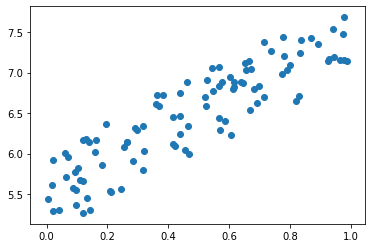

In [33]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [34]:
from dezero import Variable
import dezero.functions as F

x,y = Variable(x), Variable(y)

W = Variable(np.zeros((1,1)))
b = Variable(np.zeros(1))

def predict(x):
    y = F.matmul(x,W)+b
    return y

In [35]:
def mean_squared_error(x0,x1):
    diff = x0-x1
    return F.sum(diff**2)/len(diff)

lr = 0.1
iters=100
print(W, b)
for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)
    
    W.cleargrad()
    b.cleargrad()
    loss.backward()
    W.data -=lr*W.grad.data
    b.data -=lr*b.grad.data
print(W, b, loss)

variable([[0.]]) variable([0.])
variable([[2.11807369]]) variable([5.46608905]) variable(0.07908606512411756)


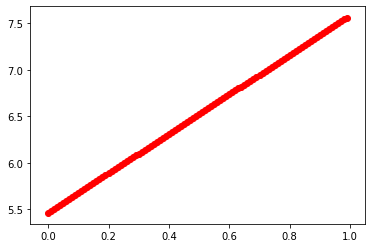

In [36]:
x = np.arange(0,1, 0.01)
y = W.data * x + b.data
plt.scatter(x, y, color="red")

In [37]:
class MeanSquaredError(Function):
    def forward(self, x0,x1):
        diff = x0-x1
        y = (diff**2).sum()/len(diff)
        return y
    
    def backward(self, gy):
        x0, x1 = self.inputs
        diff = x0 - x1
        gy = broadcast_to(gy, diff.shape)
        gx0 = gy*diff*(2./len(diff))
        gx1 = -gx0
        return gx0, gx1
    
def mean_squared_error(x0, x1):
    return MeanSquaredError()(x0,x1)

In [38]:
#ニューラルネットワーク

def linear_simple(x, W, b=None):
    x,W  = as_variable(x), as_variable(W)
    t = matmul(x,W)
    if b is None:
        return t
    
    y = t+b
    t.data = None
    return y

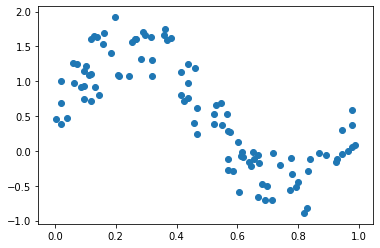

In [39]:
np.random.seed(0)
x = np.random.rand(100,1)
y = np.sin(2 * np.pi *x) + np.random.rand(100, 1)
plt.scatter(x,y)

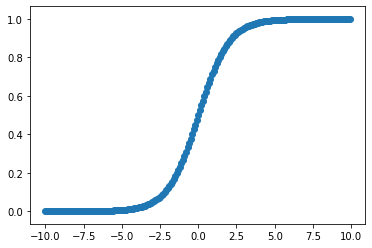

In [40]:
#非線形な変換を行う活性化関数
x = np.arange(-10,10, 0.1)
y = 1/(1+np.exp(-x))
plt.scatter(x,y)

variable(0.8473695850105871)
variable(0.2514286285183606)
variable(0.2475948546674987)
variable(0.23786120447054812)
variable(0.21222231333102928)
variable(0.16742181117834165)
variable(0.09681932619992666)
variable(0.07849528290602334)
variable(0.07749729552991153)
variable(0.07722132399559316)


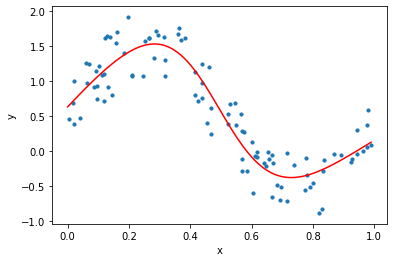

In [41]:
import numpy as np
from dezero import Variable
import dezero.functions as F

np.random.seed(0)
x = np.random.rand(100,1)
y = np.sin(2*np.pi*x)+np.random.rand(100,1)

I,H,O = 1,10,1
w1 = Variable(0.01*np.random.randn(I,H))
b1 = Variable(np.zeros(H))
w2 = Variable(0.01*np.random.randn(H,O))
b2 = Variable(np.zeros(O))

def predict(x):
    y = F.linear(x,w1,b1)
    y = F.sigmoid(y)
    y = F.linear(y, w2, b2)
    return y

lr = lr=0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)
    w1.cleargrad()
    b1.cleargrad()
    w2.cleargrad()
    b2.cleargrad()
    loss.backward()
    
    w1.data -= lr * w1.grad.data
    b1.data -= lr * b1.grad.data
    w2.data -= lr * w2.grad.data
    b2.data -= lr * b2.grad.data
    if i % 1000==0:
        print(loss)
        
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()


In [42]:
class Parameter(Variable):
    pass

In [43]:
from dezero import Variable, Parameter
x  =Variable(np.array(1.0))
p = Parameter(np.array(2.0))
y = x*p
print(isinstance(p, Parameter))
print(isinstance(x, Parameter))
print(isinstance(y, Parameter))

True
False
False


In [44]:
# from dezero.core import Parameter

# class Layer:
#     def __init__(self):
#         self.__params = set()
        
#     def __setattr__(self, name, value):
#         if isinstance(value, Parameter):
#             self._params.add(name)
#         super().__setattr__(name, value)

In [45]:
from dezero import Layer

layer = Layer()
layer.p1 = Parameter(np.array(1))
layer.p2 = Parameter(np.array(2))
layer.p3 = Variable(np.array(3))
layer.p4 = "test"

print(layer._params)
for name in layer._params:
    print(name, layer.__dict__[name])

{'p1', 'p2'}
p1 variable(1)
p2 variable(2)


In [46]:
import weakref 
class Layer:
    def __call__(self, *inputs):
        outputs = self.forward(*input)
        if not isinstance(outputs, tuple):
            outputs = (outputs,)
            
        self.inputs = [weakref.ref(x) for x in inputs]
        self.outputs = [weakref.ref(y) for y in outputs]
        return outputs if len(outputs)> 1 else outputs[0]
    
    def forward(self, inputs):
        raise NotImplementedError()
        
    def params(self):
        for  name in self._params:
            yield self.__dict__[name]
            
    def cleargrads(self):
        for param in self.params():
            param.cleargrad()
            


In [47]:
import numpy as np
from dezero  import Variable
import dezero.functions as F
import dezero.layers as L

np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2*np.pi*x) + np.random.rand(100,1)
l1 = L.Linear(10)
l2 = L.Linear(1)

def predict(x):
    y = l1(x)
    y = F.sigmoid(y)
    y = l2(y)
    return y

lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)
    l1.cleargrads()
    l2.cleargrads()
    loss.backward()
    
    for l in [l1,l2]:
        for p in l.params():
            p.data -=lr*p.grad.data
    
    if i % 1000 ==0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.23721590814318072)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.0788816650635515)
variable(0.07655073683421633)
variable(0.07637803086238223)
variable(0.07618764131185568)


In [48]:
class TwoLayerNet(Layer):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)
        
    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y

In [49]:
from dezero import Layer
from dezero import utils

class Model(Layer):
    def plot(self, *inputs, to_file="model.png"):
        y = self.forward(*inputs)
        return utils.plot_dot_graph(y, verbose=True, to_file=to_file)

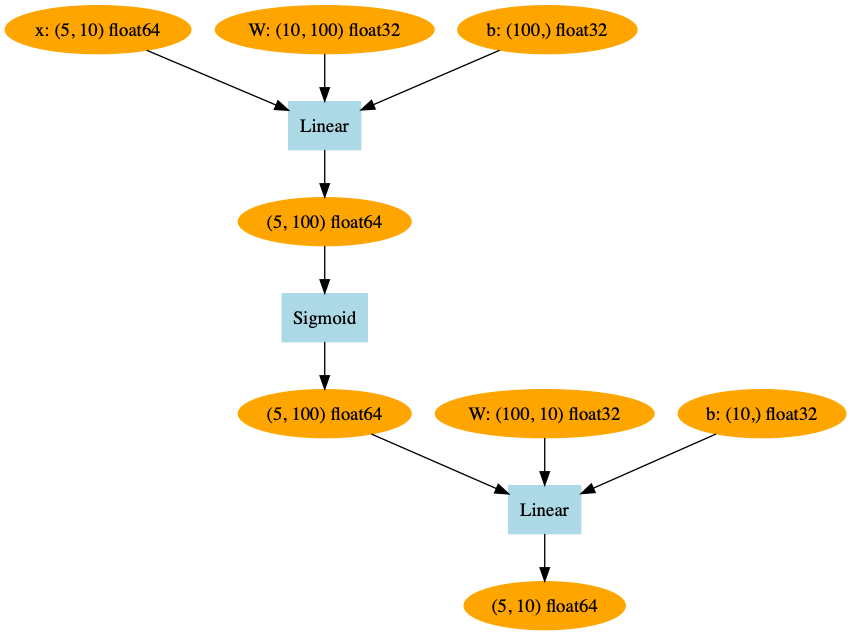

In [50]:
from dezero.models  import Model

class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)
        
    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y
        
x = Variable(np.random.randn(5,10),name="x")
model = TwoLayerNet(100, 10)
model.plot(x)

In [51]:
from dezero.models  import Model


        
x = np.random.randn(100,1)
y = np.sin(2*np.pi*x) + np.random.rand(100, 1)

lr =0.2
maxx_iter = 10000
hidden_size = 10


class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)
        
    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y

model = TwoLayerNet(hidden_size, 1)

for i in range(iters):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)
    model.cleargrads()
    loss.backward()
    
    for p in model.params():
        p.data -= lr*p.grad.data
    
    if i % 1000==0:
        print(loss)

variable(1.1009717984850773)
variable(0.4711228869325717)
variable(0.4698283100627154)
variable(0.46916497243708827)
variable(0.46854479360395535)
variable(0.46796639533987855)
variable(0.4674451169931742)
variable(0.46697156802092743)
variable(0.46650229067591503)
variable(0.46597041771732534)


In [52]:
import dezero.models as M

In [53]:
model = M.MLP((10,1))
model = M.MLP((10, 20, 30, 40, 1))

In [54]:
class Optimizer:
    def __init__(self):
        self.target = None
        self.hooks = []
        
    def setup(self, target):
        self.target = target
        return self
    
    def update(self):
        params = [p for p in self.target.params() if p.grad is not None]
        for f in self.hooks:
            f(params)
            
        for params in params:
            self.update_one(param)
    
    def update_one(self, param):
        raise NotImplementedError()
        
    def add_hook(self, f):
        self.hooks.append(f)

In [55]:
#SGDの実装
class SGD(Optimizer):
    def __init__(self, lr=0.01):
        super().__init__()
        self.lr = lr
        
    def update_one(self, param):
        param.data -= self.lr * param.grad.data

In [56]:
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP

np.random.seed(0)
x = np.random.rand(100,1)
y = np.sin(2*np.pi*x)+np.random.rand(100,1)

lr = 0.2
iters = 10000
hidden_size=10

model = MLP((hidden_size,1))
optimizer = optimizers.SGD(lr)
optimizer.setup(model)
for i in range(iters):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)
    model.cleargrads()
    loss.backward()
    optimizer.update()
    if i % 1000==0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.23721590814318072)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.0788816650635515)
variable(0.07655073683421633)
variable(0.07637803086238223)
variable(0.07618764131185568)


In [57]:
import numpy as np

class MomentumSGD(Optimizer):
    def __init__(self, lr=0.01, momentum=0.9):
        super().__init__()
        self.lr = lr
        self.momentum = momentum
        self.vs = {}
    
    def update_one(self, param):
        v_key = id(param)
        if v_key not in self.vs:
            self.vs[v_key] = np.zeros_like(param.data)
        v = self.vs[v_key]
        v *= self.momentum
        v -= self.lr * param.grad.data
        param.data +=v

In [58]:
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([[1,2,3],[4,5,6]]))
y = F.get_item(x,1)
y

variable([4 5 6])

In [59]:
y.backward()

In [60]:
x.grad

variable([[0 0 0]
          [1 1 1]])

In [61]:
x = Variable(np.array([[1,2,3],[4,5,6]]))
indices = np.array([0,0,1])
y = F.get_item(x, indices)
y

variable([[1 2 3]
          [1 2 3]
          [4 5 6]])

In [62]:
Variable.__getitem__ = F.get_item
y = x[1]
print(y)
y = x[:2]
print(y)

variable([4 5 6])
variable([[1 2 3]
          [4 5 6]])


In [63]:
from dezero.models import MLP
model = MLP((10, 3))

x = np.array([[0.2, 0.4]])
y = model(x)
y

variable([[0.01706783 0.14927257 0.14414914]])

In [64]:
from dezero import Variable, as_variable
import dezero.functions as F

def softmax1d(x):
    x = as_variable(x)
    y = F.exp(x)
    sum_y = F.sum(y)
    return y/sum_y

In [65]:
x = Variable(np.array([[0.2, -0.4]]))
y = model(x)
p = softmax1d(y)
print(y)
print(p)

variable([[0.25337848 0.30853735 0.38821423]])
variable([[0.31239678 0.33011233 0.35749089]])


In [66]:
def softmax_simple(x,axis=1):
    x = as_variable(x)
    y = F.exp(x)
    sum_y = F.sum(y, axis=axis, keepdims=True)
    return y/sum_y

In [67]:
softmax_simple(y)

variable([[0.31239678 0.33011233 0.35749089]])

In [68]:
#cross entropy error

def softmax_cross_entropy_simple(x,t):
    x,t = as_variable(x), as_variable(t)
    N = x.shape[0]
    p = F.softmax(x)
    p = F.clip(p, 1e-15, 1.0)
    log_p = F.log(p)
    tlog_p = log_p[np.arange(N), t.data]
    y = -1*F.sum(tlog_p)/N
    return y

In [69]:
x = np.array([[0.2, -0.4], [0.3, 0.5], [1.3, -3.2], [2.1, 0.3]])
t = np.array([[2,0,1,0]])
y = model(x)
loss = F.softmax_cross_entropy_simple(y,t)
loss

variable(1.1784240941964543)

In [70]:
import dezero
x,t = dezero.datasets.get_spiral(train=True)
print(x.shape)
print(t.shape)

print(x[10], t[10])
print(x[110], t[110])

(300, 2)
(300,)
[-0.12995958 -0.00324155] 1
[ 0.3282343  -0.54941994] 0


In [71]:
import math
import numpy as np
import dezero
from dezero import optimizers
import dezero.functions as F
from dezero.models import MLP

max_epoch = 300
batch_size=30
hidden_size=10
lr=1

x,t = dezero.datasets.get_spiral(train=True)
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

In [72]:
# Hyperparameters
max_epoch = 300
batch_size = 30
hidden_size = 10
lr = 1.0

x, t = dezero.datasets.get_spiral(train=True)
model = MLP((hidden_size, 3))
optimizer = optimizers.SGD(lr).setup(model)

data_size = len(x)
max_iter = math.ceil(data_size / batch_size)
losses=[]
for epoch in range(max_epoch):
    # Shuffle index for data
    index = np.random.permutation(data_size)
    sum_loss = 0

    for i in range(max_iter):
        batch_index = index[i * batch_size:(i + 1) * batch_size]
        batch_x = x[batch_index]
        batch_t = t[batch_index]

        y = model(batch_x)
        loss = F.softmax_cross_entropy(y, batch_t)
        model.cleargrads()
        loss.backward()
        optimizer.update()

        sum_loss += float(loss.data) * len(batch_t)

    # Print loss every epoch
    avg_loss = sum_loss / data_size
    losses.append(avg_loss)
    print('epoch %d, loss %.2f' % (epoch + 1, avg_loss))



epoch 1, loss 1.13
epoch 2, loss 1.05
epoch 3, loss 0.95
epoch 4, loss 0.92
epoch 5, loss 0.87
epoch 6, loss 0.89
epoch 7, loss 0.84
epoch 8, loss 0.78
epoch 9, loss 0.80
epoch 10, loss 0.79
epoch 11, loss 0.78
epoch 12, loss 0.76
epoch 13, loss 0.77
epoch 14, loss 0.76
epoch 15, loss 0.76
epoch 16, loss 0.77
epoch 17, loss 0.78
epoch 18, loss 0.74
epoch 19, loss 0.74
epoch 20, loss 0.72
epoch 21, loss 0.73
epoch 22, loss 0.74
epoch 23, loss 0.77
epoch 24, loss 0.73
epoch 25, loss 0.74
epoch 26, loss 0.74
epoch 27, loss 0.72
epoch 28, loss 0.72
epoch 29, loss 0.72
epoch 30, loss 0.73
epoch 31, loss 0.71
epoch 32, loss 0.72
epoch 33, loss 0.72
epoch 34, loss 0.71
epoch 35, loss 0.72
epoch 36, loss 0.71
epoch 37, loss 0.71
epoch 38, loss 0.70
epoch 39, loss 0.71
epoch 40, loss 0.70
epoch 41, loss 0.71
epoch 42, loss 0.70
epoch 43, loss 0.70
epoch 44, loss 0.70
epoch 45, loss 0.69
epoch 46, loss 0.69
epoch 47, loss 0.71
epoch 48, loss 0.70
epoch 49, loss 0.69
epoch 50, loss 0.69
epoch 51,

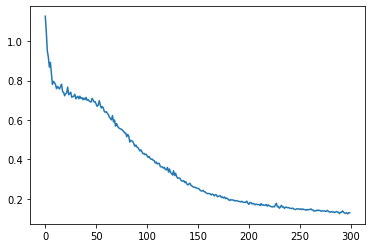

In [73]:
plt.plot(range(len(losses)), losses)


In [74]:
import numpy as np

class Dataset:
    def __init__(self, train=True):
        self.train = train
        self.data = None
        self.label = None
        self.prepare()
        
    def __getitem__(self, idx):
        assert np.isscalar(idx)
        if self.label is None:
            return self.data[idx]
        else:
            return self.data[idx], self.label[idx]
        
    def __len__(self):
        return len(self.data)
    
    def prepare(self):
        pass

In [75]:
class Spiral(Dataset):
    def prepare(self):
        self.data, self.label = get_spiral(self.train)

In [76]:
trainset = dezero.datasets.Spiral(train=True)
print(trainset[0])
print(len(trainset))

(array([-0.13981389, -0.00721657], dtype=float32), 1)
300


In [77]:
class BigData(Dataset):
    def __getitem__(idx):
        x = np.load('./data/{}.npy'.format(idx))
        t = np.load('./label/{}.py'.format(idx))
        return x,t
    
    def __len__():
        return 1000000

In [78]:
train_set = dezero.datasets.Spiral()

batch_idx = [0,1,2]
batch = [train_set[i] for i in batch_idx]

x = np.array([example[0] for example in batch])
t = np.array([example[1] for example in batch])


In [79]:
x.shape, t.shape

((3, 2), (3,))

In [80]:
class MyIterator:
    def __init__(self, max_cnt):
        self.max_cnt = max_cnt
        self.cnt=0
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.cnt ==self.max_cnt:
            raise StopIteration()
            
        self.cnt +=1
        return self.cnt

In [81]:
obj = MyIterator(5)
for x in obj:
    print(x)

1
2
3
4
5


In [83]:
class DataLoader:
    def __init__(self, dataset, batch_size, shuffle=True):
        self.dataset = dataset
        self.batchsize = batch_size
        self.shuffle = shuffle
        self.data_size = len(dataset)
        self.max_iter = math.ceil(self.data_size/batch_size)
        self.reset()
        
    def reset(self):
        self.iteration=0
        if self.shuffle:
            self.idx = np.random.permutation(len(self.dataset))
        else:
            self.idx = np.arange(len(self.dataset))
            
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.iteration >= self.max_iter:
            self.reset()
            raise StopIteration
            
        i, batch__size = self.iteration, self.batch_size
        batch_idx = self.idx[i*batch_size:[i+1]*batch_size]
        batch = [self.dataset[i] for i in batch_idx]
        x = np.array([example[0] for example in batch])
        t = np.array([example[1] for example in batch])
        self.iteration +=1
        return x,t
    
    def next(self):
        return self.__next__()

In [84]:
def accuracy(y,t):
    y,t =as_variable(y), as_variable(t)
    pred = y.data.argmax(axis=1).reshape(t.shape)
    result = (pred == t.data)
    acc = result.mean()
    return Variable(as_array(acc))